Импортируем необходимые зависимости и установим датчик случайных чисел
со значением 1, чтобы результаты были повторяемыми при проведении экспериментов.

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import cifar10
tf.random.set_seed(1)

Загрузим датасет cifar10, встроенный в tensorflow.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Проверим загруженные данные. Оформим вывод изображений.
Согласно определенным классам датасета cifar10, создадим массив названий на
русском языке.

In [ ]:
#Определяем названия классов по порядку, их соответственно 10
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака',
'лягушка', 'лошадь', 'корабль', 'грузовик']

Зависимости для вывода изображений:

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image #Для отрисовки изображений
import numpy as np
import random #Для генерации случайных чисел

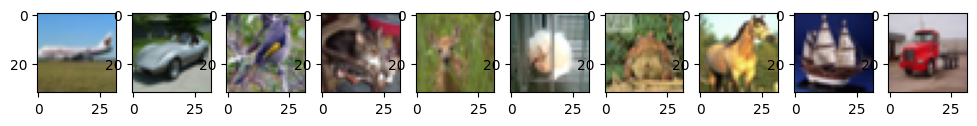

In [ ]:
#Выводим для примера картинки по каждому классу
fig, axs = plt.subplots(1, 10, figsize=(12, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков
plt.show() #Показываем изображения

Сформируем обучающую и тестовую выборки.

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
#Превращаем y_train и y_test сетей в формат one hot encoding - "один горячий" - означает «преобразовать в [компьютерный] код
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


Опишем архитектуру сети.

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

In [ ]:
x = layers.Conv2D(64, 3, activation="relu",
padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)

Формируем суммарный сигнал с выходом x и block_1_output. В частности, с
помощью слоя add описываем операцию суммирования двух входов.


In [ ]:
block_2_output = layers.add([x, block_1_output])

In [ ]:
x = layers.Conv2D(64, 3, activation="relu",
padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

In [ ]:
x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

Создаем модель с помощью класса Model, указывая входные и выходные слои и
название модели "my_resnet":


In [ ]:
model = keras.Model(inputs, outputs, name="my_resnet")

Инициализация модели.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Обучение НС.

In [ ]:
history=model.fit(x_train, y_train, batch_size=64, epochs=15,
validation_split=0.2)

Epoch 1/15
625/625 [==============================] - 14s 10ms/step - loss: 1.7807 - accuracy: 0.3090 - val_loss: 1.4801 - val_accuracy: 0.4382
Epoch 2/15
625/625 [==============================] - 5s 8ms/step - loss: 1.3517 - accuracy: 0.5006 - val_loss: 1.1734 - val_accuracy: 0.5703
Epoch 3/15
625/625 [==============================] - 5s 8ms/step - loss: 1.1309 - accuracy: 0.5936 - val_loss: 0.9917 - val_accuracy: 0.6450
Epoch 4/15
625/625 [==============================] - 6s 9ms/step - loss: 0.9842 - accuracy: 0.6507 - val_loss: 0.9280 - val_accuracy: 0.6718
Epoch 5/15
625/625 [==============================] - 5s 8ms/step - loss: 0.8789 - accuracy: 0.6892 - val_loss: 0.8433 - val_accuracy: 0.7006
Epoch 6/15
625/625 [==============================] - 6s 9ms/step - loss: 0.8029 - accuracy: 0.7203 - val_loss: 0.8057 - val_accuracy: 0.7166
Epoch 7/15
625/625 [==============================] - 5s 8ms/step - loss: 0.7329 - accuracy: 0.7458 - val_loss: 0.7446 - val_accuracy: 0.7404
Epoc

Вывод структуры модели.


In [ ]:
model.summary()

Model: "my_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)             0         ['conv2d_1[0][0]']            
 D)                                                                                       

Вывод в графическом виде структуры НС.

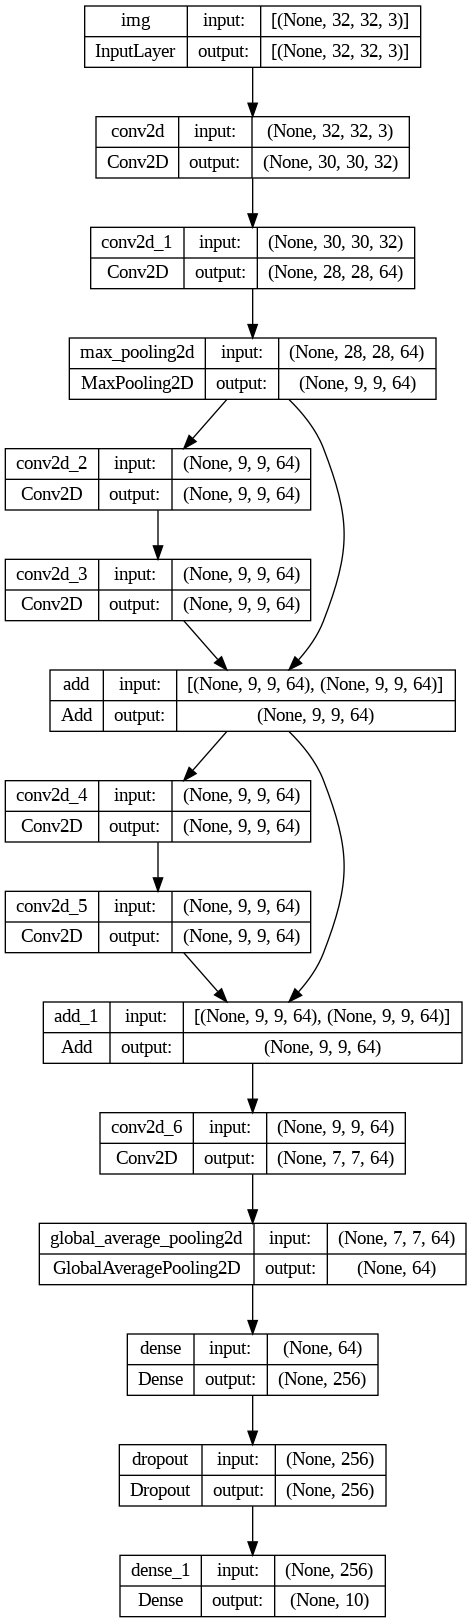

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

Отображаем график точности обучения.

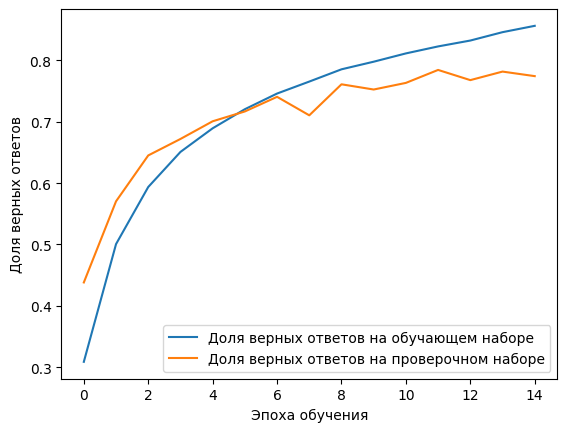

In [ ]:
plt.plot(history.history['accuracy'],
label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Строим график потерь на обучающем и тестовом наборах.

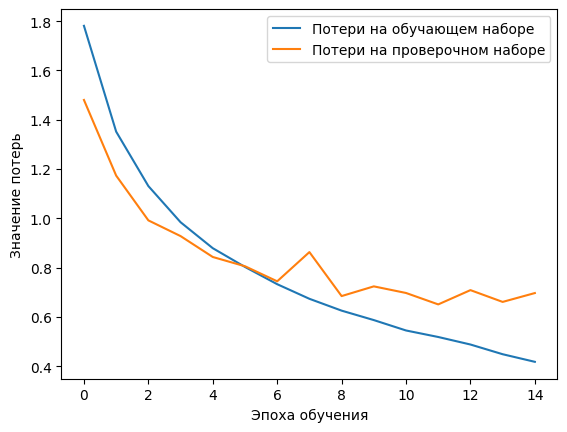

In [ ]:
# Код для построения графика потерь
plt.plot(history.history['loss'], label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], label='Потери на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

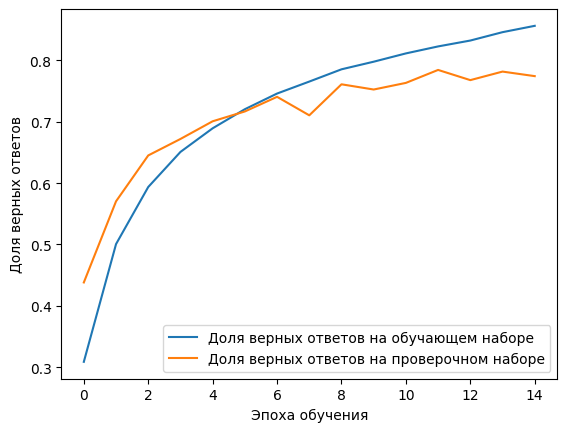

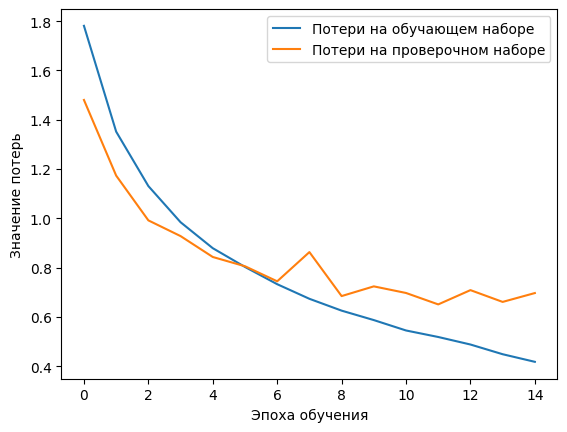

In [ ]:
#График доли верных ответов
plt.plot(history.history['accuracy'],
label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
#График потерь
plt.plot(history.history['loss'], label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], label='Потери на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение потерь')
plt.legend()
plt.show()

Тестирование обученной модели

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.7303 - accuracy: 0.7612
[0.7303308844566345, 0.7612000107765198]


Распознаём все тестовые картинки.


In [ ]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Распознаём все тестовые картинки.


In [ ]:
print(prediction.shape)

(10000, 10)


Проведем эксперимент по распознаванию изображения из набора x_test и
сравним результаты классификации из y_test.

Выход сети:  [9.8009080e-01 5.6253616e-06 1.7860333e-02 3.1037252e-05 1.6704556e-03
 7.9107522e-06 1.1748331e-04 1.9531921e-04 3.0895133e-06 1.8071301e-05]
Распознанный образ:  0
Верный ответ:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Распознанный образ на картинке:  самолет


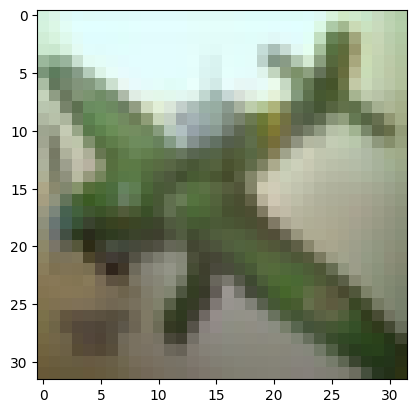

In [ ]:
#пример: Выбираем номер изображения
n = 27
#Выводим на экран картинку
plt.imshow(Image.fromarray((x_test[n]*255).astype(np.uint8)).convert('RGBA'))
#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test[n])
print("Распознанный образ на картинке: ",
classes[np.argmax(prediction[n])])

Проведем эксперимент на изображении, номер которого
должен совпадать с расчетом по формуле:
Текущий год + текущий день + текущий месяц + текущее время (часы) +
текущее время (секунды) + Ваш порядковый номер в журнале

Выход сети:  [4.0210310e-01 2.9243374e-02 5.4654058e-02 2.4238186e-02 5.2657146e-03
 1.6124607e-03 2.6887622e-01 2.6803790e-04 6.1684884e-03 2.0757034e-01]
Распознанный образ:  0
Верный ответ:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Распознанный образ на картинке:  самолет


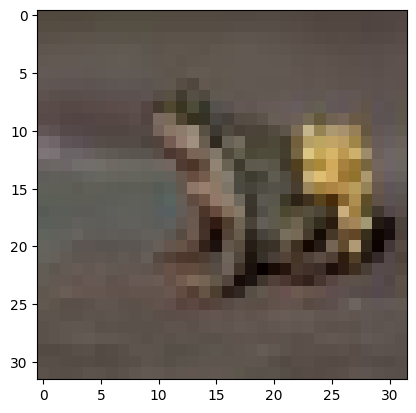

In [ ]:
#пример: Выбираем номер изображения
n = 2121 #2023+6+12+20+49+11=2121
#Выводим на экран картинку
plt.imshow(Image.fromarray((x_test[n]*255).astype(np.uint8)).convert('RGBA'))
#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test[n])
print("Распознанный образ на картинке: ",
classes[np.argmax(prediction[n])])

Keras позволяет легко создавать и комбинировать различные слои и модели нейронных сетей. Таким образом, использование архитектуры ResNet позволяет достичь высоких показателей точности при классификации изображений и уменьшении функции потерь в процессе обучения.